<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-a-Dataset" data-toc-modified-id="Generate-a-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate a Dataset</a></span></li><li><span><a href="#Compare-by-Means" data-toc-modified-id="Compare-by-Means-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare by Means</a></span></li><li><span><a href="#Compare-by-Distplots" data-toc-modified-id="Compare-by-Distplots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compare by Distplots</a></span></li><li><span><a href="#Compare-by-Boxplots" data-toc-modified-id="Compare-by-Boxplots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compare by Boxplots</a></span></li><li><span><a href="#Compare-by-T-Tests" data-toc-modified-id="Compare-by-T-Tests-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compare by T-Tests</a></span></li></ul></div>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip


# Generate a Dataset

In [3]:
# pd.Series(...) is just like a column in excel
# norm.rvs(loc=mu, scale=sigma, size=n) === sample n from N(mu, sigma)
group_ctl = pd.Series(name='height', data=sp.stats.norm.rvs(loc=170, scale=5, size=100))
group_exp_1 = pd.Series(name='height', data=sp.stats.norm.rvs(loc=170, scale=5, size=100))
group_exp_2 = pd.Series(name='height', data=sp.stats.norm.rvs(loc=170+2, scale=5, size=100))

In [4]:
group_ctl.head()

0    172.064285
1    165.201397
2    165.054554
3    175.193599
4    178.273799
Name: height, dtype: float64

In [5]:
group_exp_1.head()

0    175.161787
1    164.311062
2    168.988530
3    169.750208
4    183.498890
Name: height, dtype: float64

In [6]:
group_exp_2.head()

0    170.644002
1    180.821029
2    171.914568
3    177.850488
4    181.219505
Name: height, dtype: float64

# Compare by Means

In [7]:
group_ctl.describe()

count    100.000000
mean     169.392112
std        5.338534
min      157.757970
25%      165.932284
50%      168.850218
75%      173.299571
max      184.731558
Name: height, dtype: float64

In [8]:
group_exp_1.describe()

count    100.000000
mean     169.717742
std        4.873953
min      159.086083
25%      166.296022
50%      169.867909
75%      172.768807
max      183.498890
Name: height, dtype: float64

In [9]:
group_exp_2.describe()

count    100.000000
mean     172.130223
std        5.236093
min      158.243881
25%      169.242408
50%      172.103255
75%      175.486555
max      185.141542
Name: height, dtype: float64

In [10]:
group_exp_1.mean() > group_ctl.mean()

True

In [11]:
group_exp_2.mean() > group_ctl.mean()

True

# Compare by Distplots

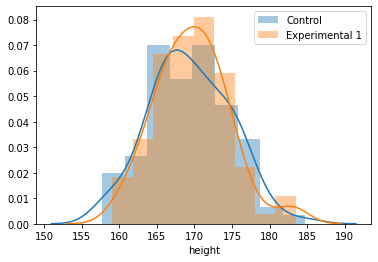

In [10]:
sns.distplot(group_ctl)
sns.distplot(group_exp_1)
plt.legend(['Control', 'Experimental 1'])

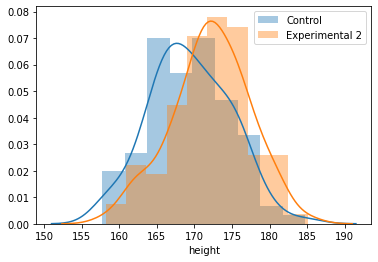

In [11]:
sns.distplot(group_ctl)
sns.distplot(group_exp_2)
plt.legend(['Control', 'Experimental 2'])

# Compare by Boxplots

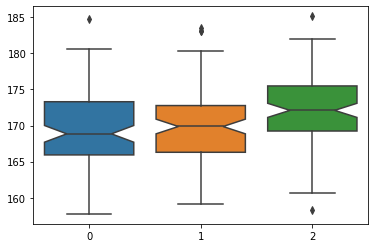

In [12]:
sns.boxplot(data=[group_ctl, group_exp_1, group_exp_2], notch=True)

* Box: $Q_1$ to $Q_3$ = 25th to 75th percentile = middle 50% of data.
* Line: the median = the 50th percentile.
* Whiskers:
    * $ Q_1 - 1.5 IQR $, where $ IQR = Q_3 - Q_1 $.
    * $ Q_3 + 1.5 IQR $.
    * = middle 99.3% if data follow a normal distribution.
* Points: out of middle 99.3% if data follow a normal distribution, may be outliers.
* Notch: $ median \pm 1.57\dfrac{IQR}{\sqrt{n}} $ = 95% confidence interval for the median.
    * The 95% confidence interval for the median also can be bootstrapped.
    * The 95% confidence interval also can be “for mean” in other plots.
    * If the notches don't overlap, may be different significantly.

# Compare by T-Tests

In [13]:
alpha = 0.05

In [16]:
r = sp.stats.ttest_ind(group_ctl, group_exp_1)
print(r)
print(r.pvalue < alpha)

Ttest_indResult(statistic=-0.4099072017185312, pvalue=0.6823171712742595)
False


In [17]:
r = sp.stats.ttest_ind(group_ctl, group_exp_2)
print(r)
print(r.pvalue < alpha)

Ttest_indResult(statistic=-3.1959130447343154, pvalue=0.001622421465212757)
True
